In [1]:
# Initial setup:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 1

#For fancy plots
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
from matplotlib.patches import Ellipse

import numpy as np
from scipy.special import erfcinv
import scipy.stats as st
from scipy.stats import chi2, multivariate_normal, gamma
from scipy.special import erfcinv, erfinv, erf, erfc
from scipy.linalg import sqrtm, inv

from scipy.interpolate import interp1d


import getdist
from getdist import plots, MCSamples
getdist.chains.print_load_details = False

import git
import sys, os

# Create the two toy chains and the joint chain:
path_git = git.Repo('.', search_parent_directories=True).working_tree_dir
path_global = os.path.dirname(path_git)
print('Path to git repo: {}'.format(path_global))

chi2_val = chi2.ppf(0.6827, df=2)

d = 2
L = 3  # Number of vectors
n_samples = int(1e6)

Path to git repo: /home/matias/Documents/PhD/code


# Ideal case: PTE to $N_{\sigma}$

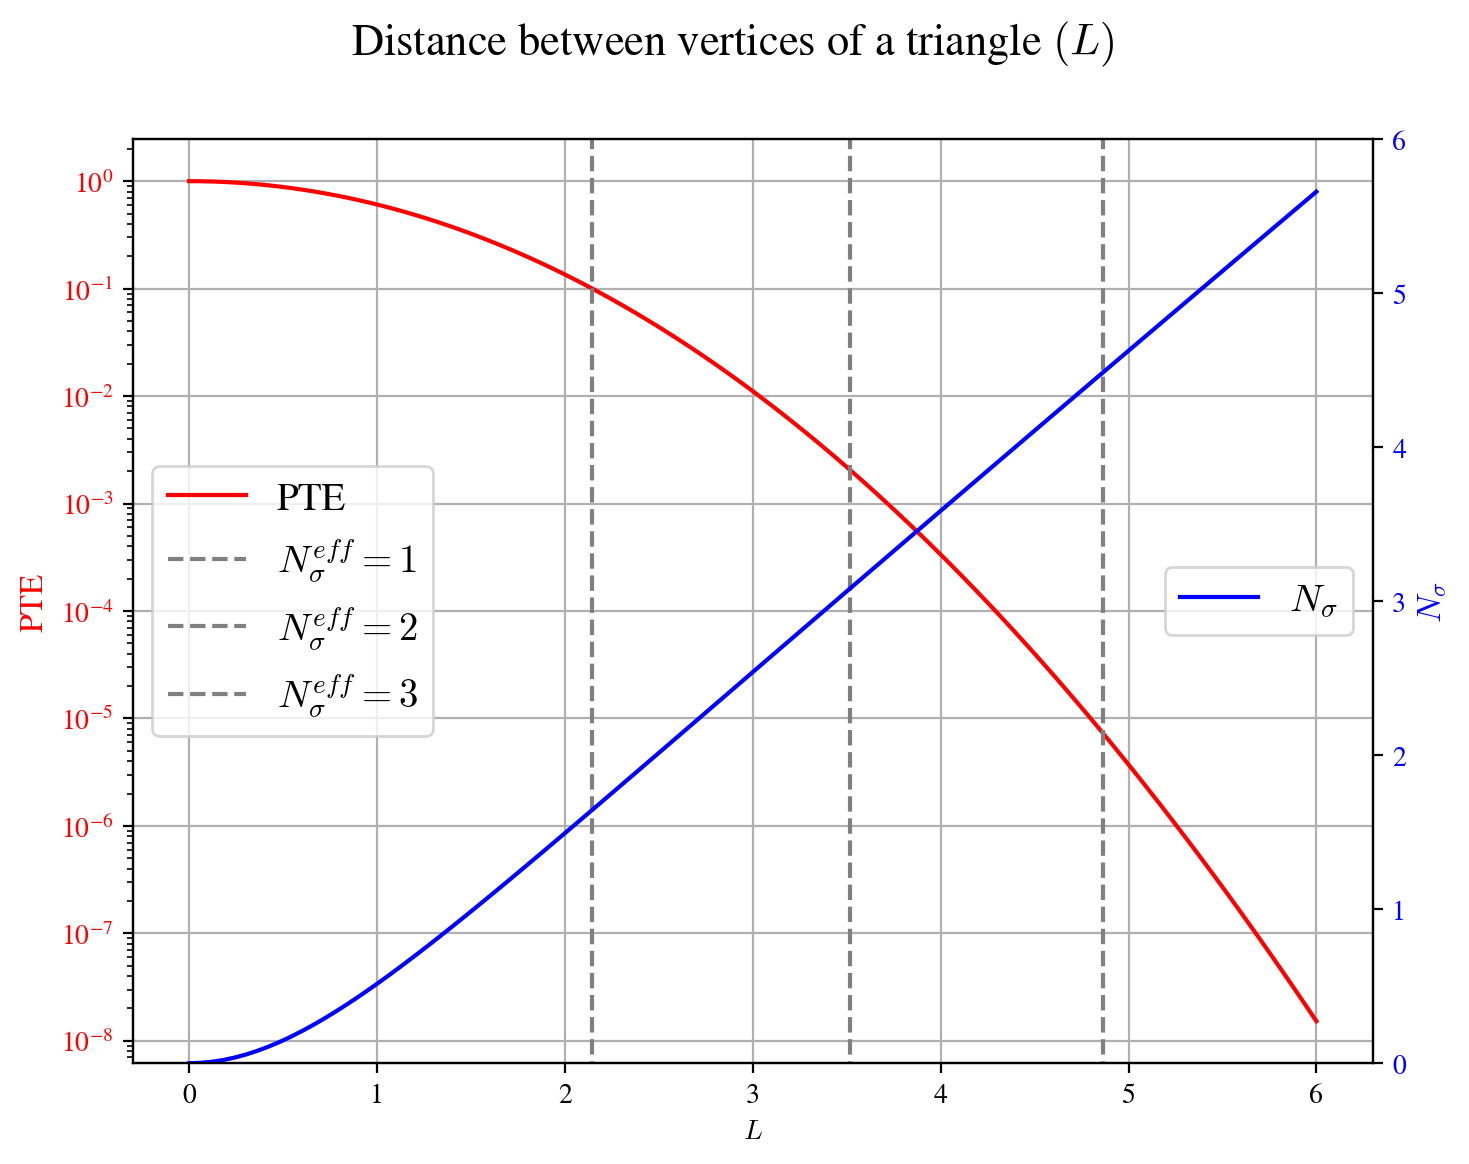

In [2]:
#Sharp triangle
factor = np.linspace(0, 6, 100)
PTE_arr = np.zeros(len(factor))
n_sigma_arr = np.zeros(len(factor))

for i in range(len(factor)):
    mean_A = factor[i] * np.array([-1/2., 0.]) 
    mean_B = factor[i] * np.array([1/2, 0.])

    cov_A = np.eye(d) / 2
    cov_B = cov_A.copy()

    r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))
    
    # Example usage:
    beta_L = np.linalg.norm(r_1)**2

    PTE_arr[i] = chi2(d).sf(beta_L)
    n_sigma_arr[i] = np.sqrt(2)*erfcinv(PTE_arr[i])

fig, axes = plt.subplots(1,1, figsize=(8, 6))
fig.suptitle(r'Distance between vertices of a triangle $(L)$'.format(factor[i]), fontsize=16)

ax1 = axes
ax2 = ax1.twinx()

#ax1.set_ylim(0, 1)
ax2.set_ylim(0, 6)

ax1.set_yscale('log')

ax1.plot(factor, PTE_arr, label='PTE', color='red')
ax1.set_xlabel(r'$L$')
ax1.set_ylabel('PTE', color='red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='red')
ax1.vlines(x=2.14277, ymin=0, ymax=6, color='gray', linestyle='--',label='$N_\sigma^{eff} = 1$')
ax1.vlines(x=3.5157, ymin=0, ymax=6, color='grey', linestyle='--',label='$N_\sigma^{eff} = 2$')
ax1.vlines(x=4.86398, ymin=0, ymax=6, color='grey', linestyle='--',label='$N_\sigma^{eff} = 3$')

ax2.plot(factor, n_sigma_arr, label='$N_\sigma$', color='blue')
ax2.set_ylabel('$N_\sigma$', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

ax1.legend(loc='center left', fontsize=14)
ax2.legend(loc='center right', fontsize=14)

ax1.grid()

fig.savefig(os.path.join(path_global, 'multidimensional_qdm_tension_vectors_sweap_cov.png'), dpi=300, bbox_inches='tight')
plt.show()

Que es $N_{\sigma}^{eff}$? Hagamos algunos graficos

In [3]:
import numpy as np
from math import erf, sqrt
from scipy.stats import chi2

def L_iso_from_n_eff(d: int, n: float, sigma2: float = 0.5, gauss_scale: str = '1sigma') -> float:
    """
    Distancia euclídea L entre las medias de dos Gaussianas D-dimensionales
    idénticas e isotrópicas (Sigma = sigma2 * I), tal que sus contornos 
    que en 1D corresponden a ±nσ se 'toquen'.

    Parámetros
    ----------
    d : int
        Dimensión (D).
    n : float
        'Número de sigmas' 1D (es decir, p = erf(n / sqrt(2))).
    sigma2 : float, opcional
        Varianza isotrópica por eje (default 0.5).

    Devuelve
    --------
    L : float
        Distancia euclídea entre medias.
    """


    if gauss_scale == '1sigma':
        # Probabilidad 1D asociada a ±nσ
        p = erf(n / sqrt(2.0)) #is the same, less general
        #p = chi2.cdf(n**2, df=1)  # Cumulative distribution function for chi2Q
    elif gauss_scale == '2sigma':
        p = chi2.cdf(n**2, df=2)  # Cumulative distribution function for chi2

    # Cuantil chi-cuadrado con d grados de libertad
    m2 = chi2.ppf(p, df=d)              # m^2 = χ²_{d,p}
    m  = sqrt(m2)
    # En isotrópico: L = 2 * σ * m, con σ = sqrt(sigma2)
    return 2.0 * sqrt(sigma2) * m

print('--- Using 1sigma scale ---')
for n in [1, 2, 3, 4, 5]:
    print(n, L_iso_from_n_eff(d=2, n=n))   # d=2, sigma^2=0.5

print('--- Using 2sigma scale ---')
for n in [1, 2, 3, 4, 5]:
    print(n, L_iso_from_n_eff(d=2, n=n, gauss_scale='2sigma'))   # d=2, sigma^2=0.5

--- Using 1sigma scale ---
1 2.142778070122352
2 3.515700301858557
3 4.863981513513553
4 6.21834521588094
5 7.5820448992254725
--- Using 2sigma scale ---
1 1.4142135623730951
2 2.8284271247461903
3 4.242640687119287
4 5.656854249492375
5 7.071067811867373


In [4]:
erf(1 / np.sqrt(2.0))

0.6826894921370859

Factor: 0.0, PTE: 1, N_sigma: -0


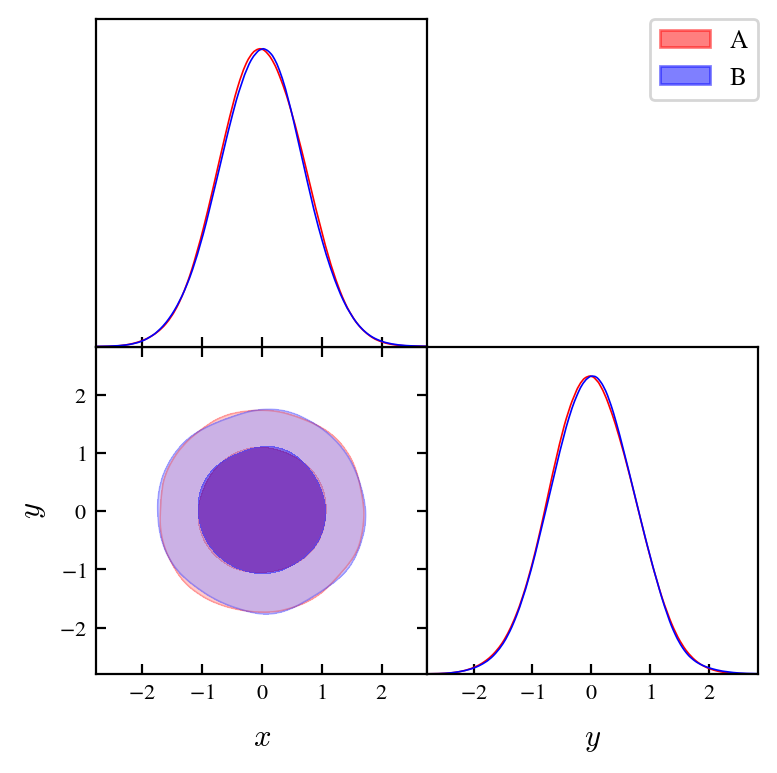

Factor: 2.142778070122352, PTE: 0.101, N_sigma: 1.64


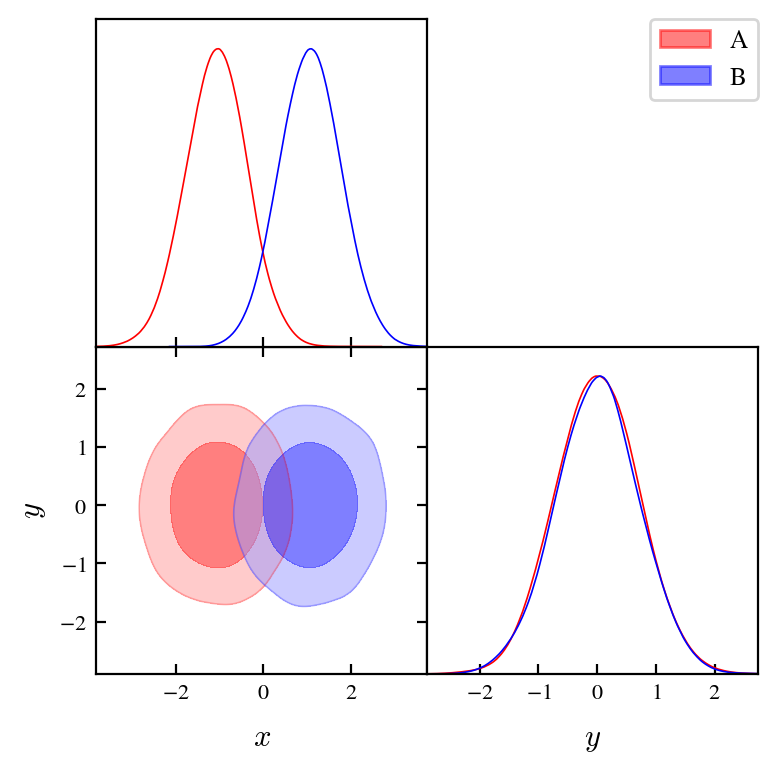

Factor: 3.515700301858557, PTE: 0.00207, N_sigma: 3.08


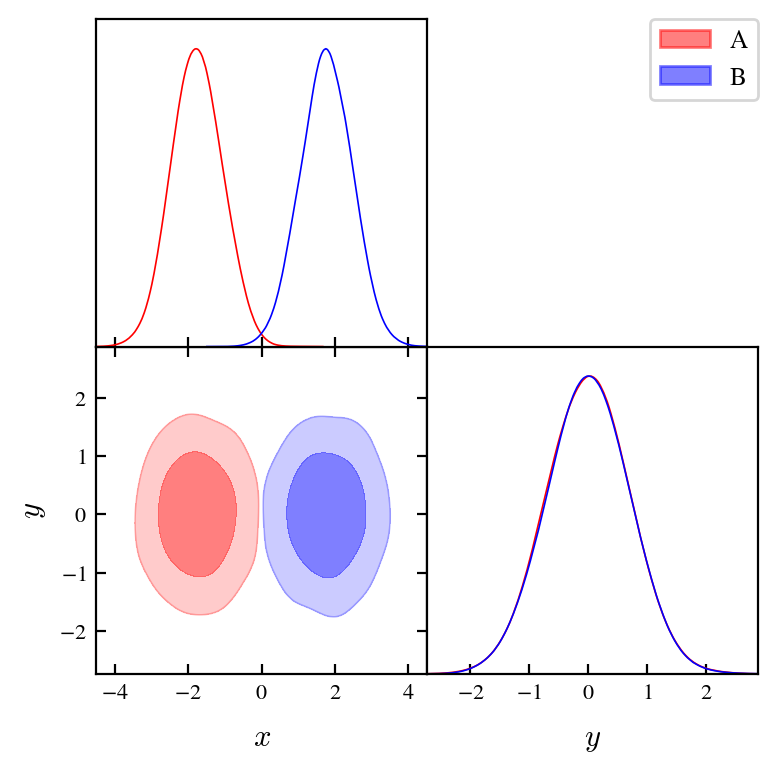

Factor: 4.863981513513553, PTE: 7.29e-06, N_sigma: 4.49


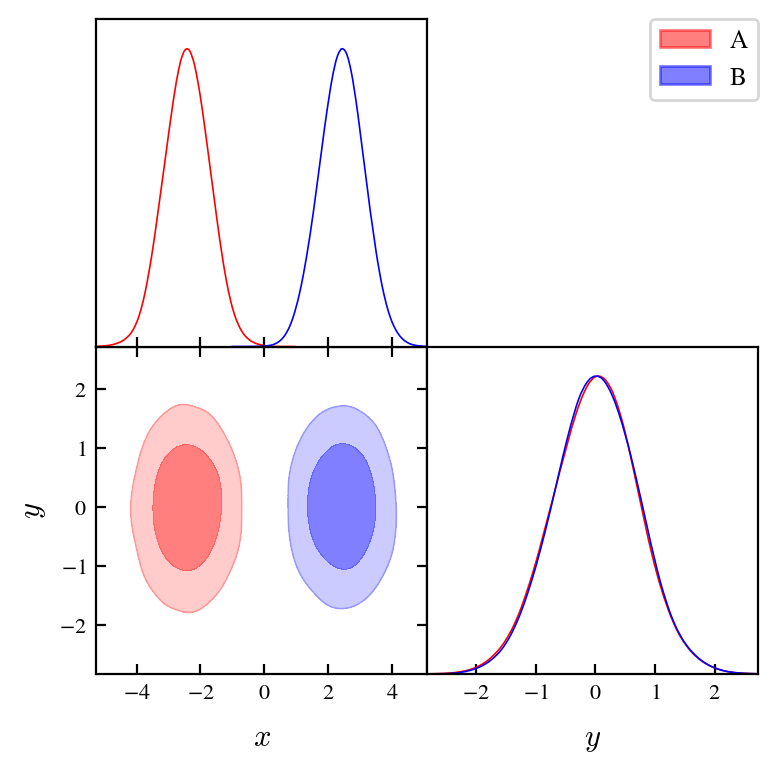

Factor: 6.21834521588094, PTE: 4.01e-09, N_sigma: 5.88


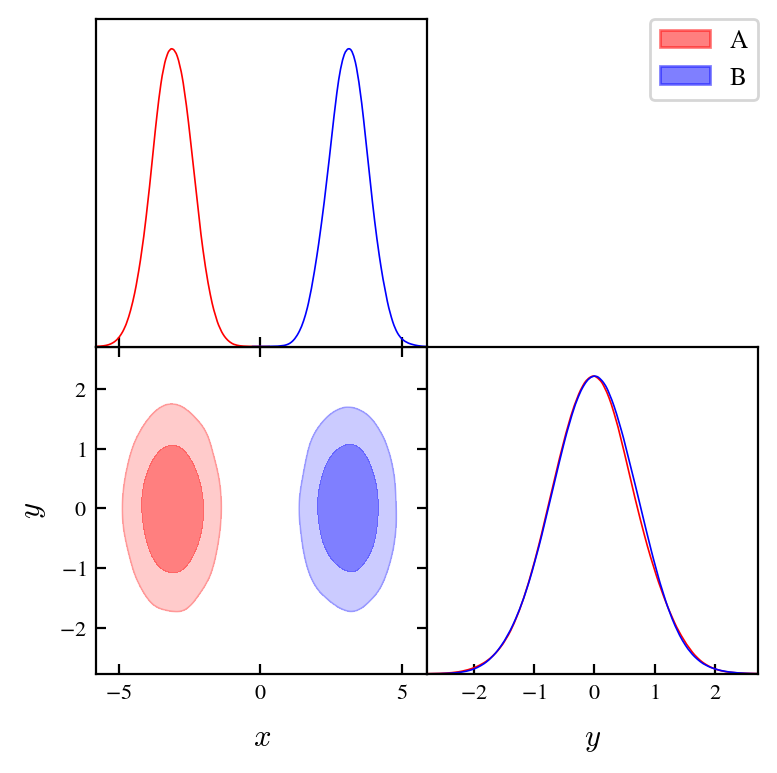

Factor: 7.5820448992254725, PTE: 3.29e-13, N_sigma: 7.28


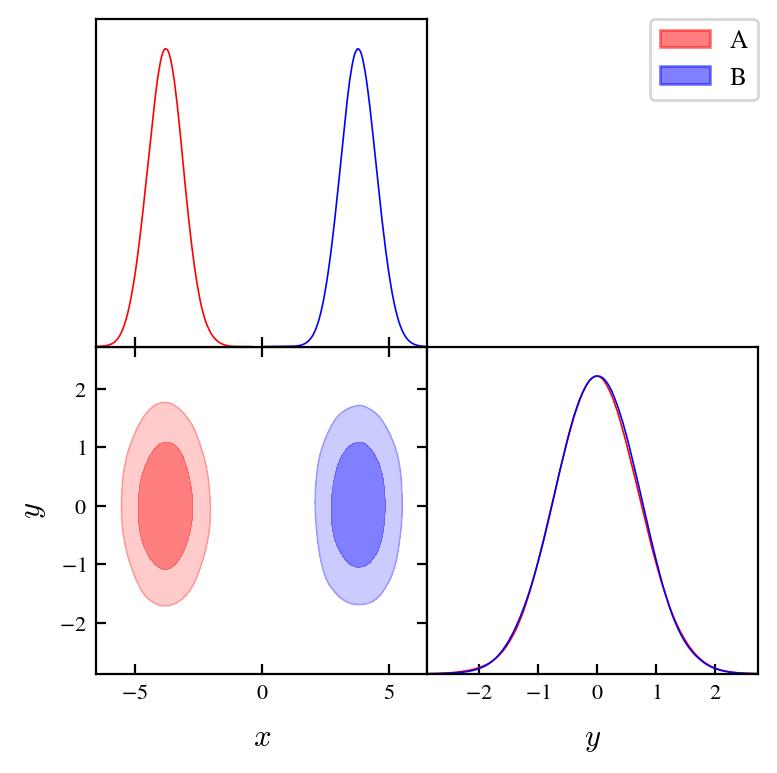

In [5]:
#Sharp triangle

factor = [0., L_iso_from_n_eff(d=2, n=1),
          L_iso_from_n_eff(d=2, n=2), L_iso_from_n_eff(d=2, n=3),
          L_iso_from_n_eff(d=2, n=4), L_iso_from_n_eff(d=2, n=5)]


for i in range(len(factor)):
    mean_A = factor[i] * np.array([-1/2., 0.])
    mean_B = factor[i] * np.array([1/2, 0.])

    cov_A = np.eye(d) / 2
    cov_B = cov_A.copy()
    cov_C = cov_A.copy()

    r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))

    # Example usage:
    beta_L = np.linalg.norm(r_1)**2

    PTE = chi2(d).sf(beta_L)
    n_sigma = np.sqrt(2)*erfcinv(PTE)

    print(f"Factor: {factor[i]}, PTE: {PTE:.3g}, N_sigma: {n_sigma:.3g}")


    names = ['x', 'y']
    labels = ['x', 'y']

    lim_x = np.array([-10, 10])
    lim_y = np.array([-10, 10])

    samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
    samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)

    chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
    chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')

    colors = ['red', 'blue', 'green']

    g = plots.get_subplot_plotter()
    g.triangle_plot([chain_A, chain_B],\
                    filled=True, contour_args={'alpha':0.5},\
                    contour_colors=colors,
                    legend_labels=['A', 'B'])
    #g.add_param_markers({'x':[mean_A[0], mean_B[0], mean_C[0]],
    #                    'y':[mean_A[1], mean_B[1], mean_C[1]],
    #                    },)

    #g.export(os.path.join(path_global, 'multidimensional_qdm_tension_vectors_triangle_L_{:.3g}.png'.format(factor[i])))
    plt.show()

In [6]:

def L_to_N_sigma_eff(L, d: int): 
    n_sigma_eff_arr = np.linspace(0, 6, 100)
    L_arr = np.zeros(len(n_sigma_eff_arr))
    for i in range(len(n_sigma_eff_arr)):
        L_arr[i] = L_iso_from_n_eff(d=d, n=n_sigma_eff_arr[i])
    L_to_N_sigma_eff = interp1d(L_arr, n_sigma_eff_arr)(L)
    return L_to_N_sigma_eff


def PTE_to_L_mapping(PTE, d: int):
    factor = np.linspace(0, 10, 100)
    PTE_arr = np.zeros(len(factor))

    for i in range(len(factor)):
        mean_A = factor[i] * np.array([-1/2., 0.]) 
        mean_B = factor[i] * np.array([1/2, 0.])

        cov_A = np.eye(d) / 2
        cov_B = cov_A.copy()

        r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))
        
        # Example usage:
        beta_L = np.linalg.norm(r_1)**2

        PTE_arr[i] = chi2(d).sf(beta_L)

    PTE_to_L = interp1d(PTE_arr, factor)(PTE)

    return PTE_to_L


def PTE_to_N_sigma_eff(PTE, d: int):
    L = PTE_to_L_mapping(PTE, d=d)
    n_sigma_eff = L_to_N_sigma_eff(L, d=d)
    return n_sigma_eff


print('N_sigma_eff(L): {}'.format(L_to_N_sigma_eff(6.21834521588094,d=2)))

PTE_0 = 0.00000001
print('L(PTE): {}'.format(PTE_to_L_mapping(PTE_0, d=2)))
print('N_sigma_eff(PTE): {}'.format(PTE_to_N_sigma_eff(PTE_0, d=2)))



N_sigma_eff(L): 4.0
L(PTE): 6.072385254614517
N_sigma_eff(PTE): 3.8925606370995967


# Real Data

In [7]:
# Create the two toy chains and the joint chain:
#os.chdir(os.path.join(path_git, 'source'))

#os.chdir(os.path.join(path_global,'montepython_public_old','output'))   
#os.chdir('/home/matias/Documents/PhD/code/montepython_public_old/output')

#Fixed Parameters
#num_parameters = 2
#num_datasets = 4

'''
A: CC 
B: Planck18 
C: BAO 
D: PPS
'''

os.chdir(os.path.join(path_global,'Cobaya','output','cluster','lcdm'))


#Fixed Parameters
#num_parameters = 2
#num_datasets = 4

chain_A = getdist.mcsamples.loadMCSamples(file_root='lcdm_cc/lcdm_cc', no_cache=True,settings={'loglikes':True,'names':'CC','label':'CC','ignore_rows': '0.3'})
chain_B = getdist.mcsamples.loadMCSamples(file_root='lcdm_planck/lcdm_planck', no_cache=True,settings={'loglikes':True,'names':'Planck18','label':'Planck18','ignore_rows': '0.3'})
chain_C = getdist.mcsamples.loadMCSamples(file_root='lcdm_desi_dr2/lcdm_desi_dr2', no_cache=True,settings={'loglikes':True,'names':'DESI DR2','label':'DESI DR2','ignore_rows': '0.3'})
chain_D = getdist.mcsamples.loadMCSamples(file_root='lcdm_pps/lcdm_pps', no_cache=True,settings={'names':'PPS','label':'PPS','ignore_rows': '0.3'})


'''
chain_A = getdist.mcsamples.loadMCSamples(file_root='lcdm_cc/2023-09-18_1000000_', no_cache=True,settings={'loglikes':True,'label':'CC','ignore_rows': '0.3'})
chain_B = getdist.mcsamples .loadMCSamples(file_root='lcdm_planck/2023-09-16_1000000_', no_cache=True,settings={'loglikes':True,'label':'Planck18','ignore_rows': '0.3'})
chain_C = getdist.mcsamples.loadMCSamples(file_root='lcdm_bao_plus/2024-03-07_1000000_', no_cache=True,settings={'label':'BAO','ignore_rows': '0.3'})
chain_D = getdist.mcsamples.loadMCSamples(file_root='lcdm_pps/2023-09-18_1000000_', no_cache=True,settings={'label':'PPS','ignore_rows': '0.3'})
'''


param_names = ['Omega_m','H0'] #Shared paameters
names = param_names
labels = names

#Estimate the mean and covariance of the chains:
mean_A_0 = chain_A.mean(param_names)
mean_B_0 = chain_B.mean(param_names)
mean_C_0 = chain_C.mean(param_names)
mean_D_0 = chain_D.mean(param_names)

cov_A_0 = chain_A.cov(param_names)
cov_B_0 = chain_B.cov(param_names)
cov_C_0 = chain_C.cov(param_names)
cov_D_0 = chain_D.cov(param_names)

In [ ]:
# CC + Planck
print('--- CC + Planck ---')
mean_A = mean_A_0
mean_B = mean_B_0
cov_A = cov_A_0
cov_B = cov_B_0

r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))
PTE_0 = chi2.sf(np.linalg.norm(r_1)**2, df=2)

print('N_sigma: {:.3g}'.format(np.sqrt(2)*erfcinv(PTE_0)))
print('L(PTE): {:.3g}'.format(PTE_to_L_mapping(PTE_0, d=2)))
print('N_sigma_eff(PTE): {:.3g}'.format(PTE_to_N_sigma_eff(PTE_0, d=2)))

# CC + BAO
print('--- CC + BAO ---')
mean_A = mean_A_0
mean_B = mean_C_0
cov_A = cov_A_0
cov_B = cov_C_0

r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))
PTE_0 = chi2.sf(np.linalg.norm(r_1)**2, df=2)

print('N_sigma: {:.3g}'.format(np.sqrt(2)*erfcinv(PTE_0)))
print('L(PTE): {:.3g}'.format(PTE_to_L_mapping(PTE_0, d=2)))
print('N_sigma_eff(PTE): {:.3g}'.format(PTE_to_N_sigma_eff(PTE_0, d=2)))

# CC + PPS
print('--- CC + PPS ---')
mean_A = mean_A_0
mean_B = mean_D_0
cov_A = cov_A_0
cov_B = cov_D_0

r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))
PTE_0 = chi2.sf(np.linalg.norm(r_1)**2, df=2)

print('N_sigma: {:.3g}'.format(np.sqrt(2)*erfcinv(PTE_0)))
print('L(PTE): {:.3g}'.format(PTE_to_L_mapping(PTE_0, d=2)))
print('N_sigma_eff(PTE): {:.3g}'.format(PTE_to_N_sigma_eff(PTE_0, d=2)))

# Planck + BAO
print('--- Planck + BAO ---')
mean_A = mean_B_0
mean_B = mean_C_0
cov_A = cov_B_0
cov_B = cov_C_0

r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))
PTE_0 = chi2.sf(np.linalg.norm(r_1)**2, df=2)

print('N_sigma: {:.3g}'.format(np.sqrt(2)*erfcinv(PTE_0)))
print('L(PTE): {:.3g}'.format(PTE_to_L_mapping(PTE_0, d=2)))
print('N_sigma_eff(PTE): {:.3g}'.format(PTE_to_N_sigma_eff(PTE_0, d=2)))

# Planck + PPS
print('--- Planck + PPS (d=2)---')
mean_A = mean_B_0
mean_B = mean_D_0
cov_A = cov_B_0
cov_B = cov_D_0

r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))
PTE_0 = chi2.sf(np.linalg.norm(r_1)**2, df=2)

print('N_sigma: {:.3g}'.format(np.sqrt(2)*erfcinv(PTE_0)))
print('L(PTE): {:.3g}'.format(PTE_to_L_mapping(PTE_0, d=2)))
print('N_sigma_eff(PTE): {:.3g}'.format(PTE_to_N_sigma_eff(PTE_0, d=2)))

# BAO + PPS
print('--- BAO + PPS ---')
mean_A = mean_C_0
mean_B = mean_D_0
cov_A = cov_C_0
cov_B = cov_D_0

r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))
PTE_0 = chi2.sf(np.linalg.norm(r_1)**2, df=2)

print('N_sigma: {:.3g}'.format(np.sqrt(2)*erfcinv(PTE_0)))
print('L(PTE): {:.3g}'.format(PTE_to_L_mapping(PTE_0, d=2)))
print('N_sigma_eff(PTE): {:.3g}'.format(PTE_to_N_sigma_eff(PTE_0, d=2))) 

print('--- End ---')

--- CC + Planck ---
N_sigma: 0.346
L(PTE): 0.794
N_sigma_eff(PTE): 0.184
--- CC + BAO ---
N_sigma: 0.189
L(PTE): 0.569
N_sigma_eff(PTE): 0.0997
--- CC + PPS ---
N_sigma: 2.57
L(PTE): 3.03
N_sigma_eff(PTE): 1.64
--- Planck + BAO ---
N_sigma: 1.06
L(PTE): 1.58
N_sigma_eff(PTE): 0.617
--- Planck + PPS ---
N_sigma: 5.68
L(PTE): 6.02
N_sigma_eff(PTE): 3.86
--- BAO + PPS ---
N_sigma: 1.39
L(PTE): 1.9
N_sigma_eff(PTE): 0.833
--- End ---


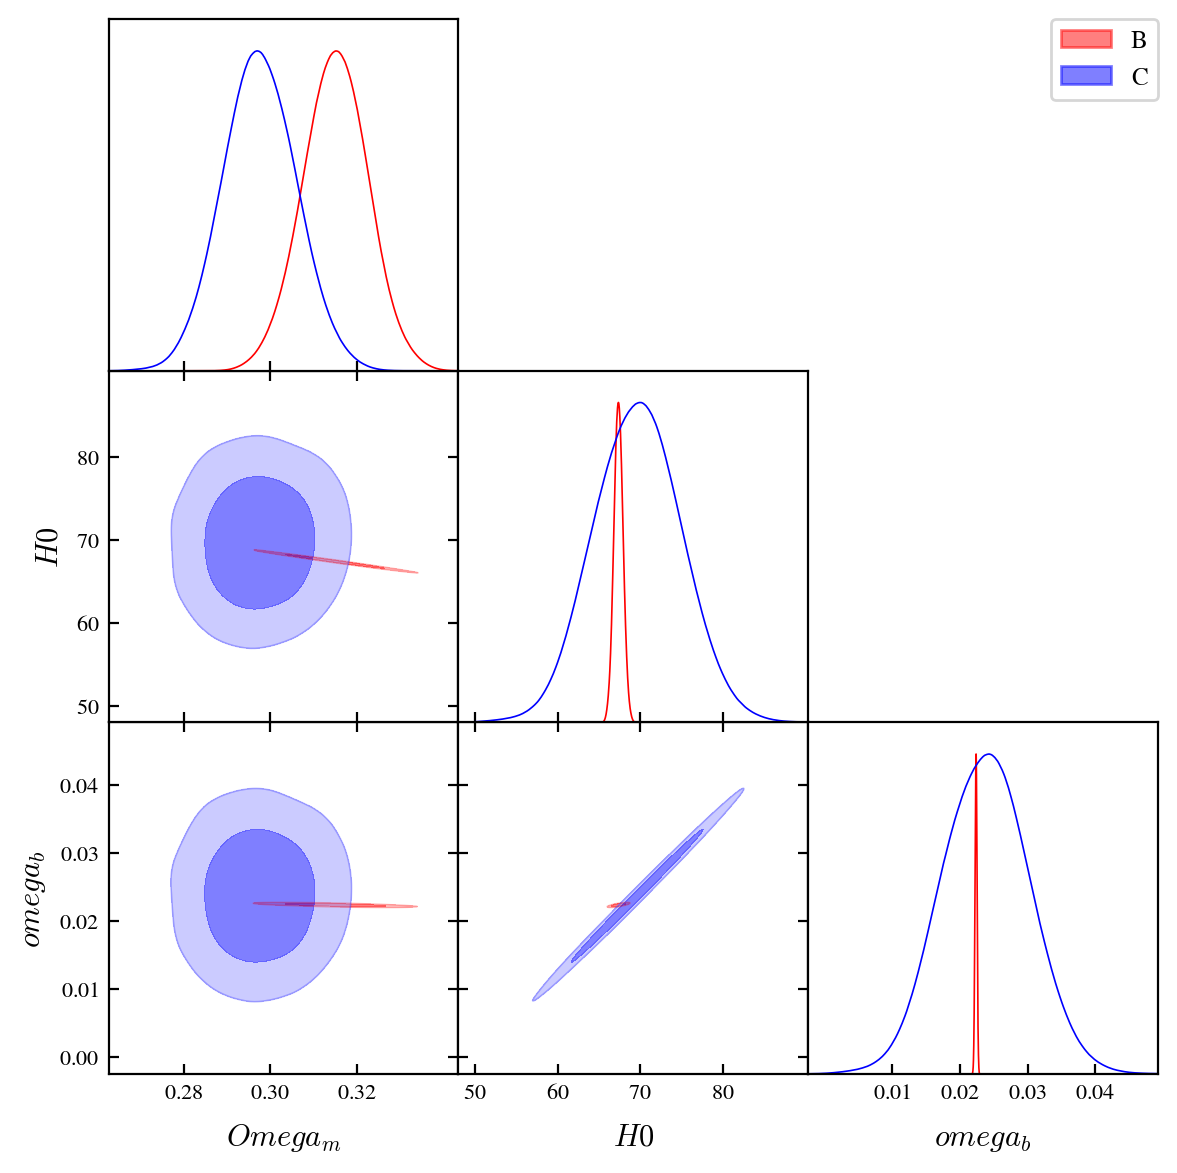

N_sigma: 1.15
L(PTE): 2.03
N_sigma_eff(PTE): 0.581


In [9]:
'''
chain_C_new = chain_C.copy()
p = chain_C_new.getParams()
chain_C_new.addDerived(100*p.Omega_b*(p.H0/100)**2, name='omega_b', label='10^{-2}\omega{}_{b }')
'''

param_names = ['Omega_m','H0','omega_b'] #Shared paameters
names = param_names
labels = names


#Estimate the mean and covariance of the chains:
mean_B_0 = chain_B.mean(param_names)
#mean_C_0 = chain_C_new.mean(param_names)
mean_C_0 = chain_C.mean(param_names)

cov_B_0 = chain_B.cov(param_names)
#cov_C_0 = chain_C_new.cov(param_names)
cov_C_0 = chain_C.cov(param_names)

samps_B = np.random.multivariate_normal(mean_B_0, cov_B_0, size=10000)
samps_C = np.random.multivariate_normal(mean_C_0, cov_C_0, size=10000)

chain_B_sample = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C_sample = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')


g = plots.get_subplot_plotter()
g.triangle_plot([chain_B_sample, chain_C_sample],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors,
                legend_labels=['B', 'C'])
plt.show()



r_1 = np.dot(sqrtm(np.linalg.inv(cov_B_0 + cov_C_0)), (mean_B_0 - mean_C_0))
PTE_0 = chi2.sf(np.linalg.norm(r_1)**2, df=3)


def PTE_to_L_mapping(PTE, d=3):
    factor = np.linspace(0, 10, 100)
    PTE_arr = np.zeros(len(factor))

    for i in range(len(factor)):
        mean_A = factor[i] * np.array([-1/2., 0., 0.]) 
        mean_B = factor[i] * np.array([1/2, 0., 0.])

        cov_A = np.eye(d) / 2
        cov_B = cov_A.copy()

        r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B))
        
        # Example usage:
        beta_L = np.linalg.norm(r_1)**2

        PTE_arr[i] = chi2(d).sf(beta_L)

    PTE_to_L = interp1d(PTE_arr, factor)(PTE)

    return PTE_to_L


print('N_sigma: {:.3g}'.format(np.sqrt(2)*erfcinv(PTE_0)))
print('L(PTE): {:.3g}'.format(PTE_to_L_mapping(PTE_0, d=3)))
print('N_sigma_eff(PTE): {:.3g}'.format(PTE_to_N_sigma_eff(PTE_0, d=3)))